In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv("stats_2016-2019.csv")

In [3]:
df.head()

,team,time to throw,average completed air yards,average intended air yards,average air yards differential,aggressiveness,longest completed air distance,air yards to the sticks,attempts,yards,tds,ints,passer rating,completion percentage,expected completion percentage,completion percentage delta,name,season,standardized delta
0,SF,2.49,6.5,9.1,-2.6,21.9,36.9,0.5,160.0,925.0,5.0,6.0,68.4,56.9,64.2,-7.3,Blaine Gabbert,2016.0,-1.814450
1,CLE,2.80,7.4,10.4,-3.0,15.8,52.3,1.1,165.0,1100.0,6.0,6.0,72.3,54.5,59.5,-5.0,Josh McCown,2016.0,-1.200110
2,CHI,2.68,8.4,10.5,-2.1,21.8,47.7,1.3,216.0,1611.0,8.0,14.0,68.3,59.7,58.7,1.0,Matt Barkley,2016.0,0.402516
3,CHI,2.49,5.7,8.2,-2.5,22.0,45.5,-0.8,200.0,1437.0,6.0,0.0,97.9,67.0,61.7,5.3,Brian Hoyer,2016.0,1.551065
4,GB,2.87,6.3,9.2,-3.0,16.4,60.8,0.8,610.0,4428.0,40.0,7.0,104.2,65.7,62.2,3.5,Aaron Rodgers,2016.0,1.070277


In [8]:
df['completion percentage delta'].describe()

count    158.000000
mean      -0.506962
std        3.743855
min      -10.800000
25%       -3.000000
50%       -0.400000
75%        1.700000
max        8.400000
Name: completion percentage delta, dtype: float64

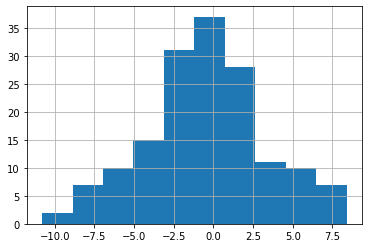

In [4]:
df['completion percentage delta'].hist()

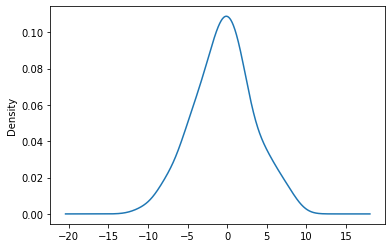

In [5]:
df['completion percentage delta'].plot.kde()

In [10]:
stats.kstest(df['standardized delta'], 'norm')

KstestResult(statistic=0.0522052140435042, pvalue=0.7823327920113265)

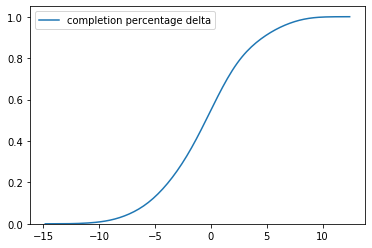

In [11]:
sns.kdeplot(df['completion percentage delta'], cumulative=True)

In [14]:
df.sort_values(by='standardized delta',
               ascending=False)[['name', 'season', 'standardized delta', 'tds', 'ints', 'completion percentage']].iloc[:10]

,name,season,standardized delta,tds,ints,completion percentage
30,Kirk Cousins,2016.0,2.379089,25.0,12.0,67.1
143,Ryan Tannehill,2019.0,2.298957,22.0,6.0,70.3
7,Matt Ryan,2016.0,2.111984,38.0,7.0,69.9
36,Dak Prescott,2016.0,2.085274,23.0,4.0,67.8
83,Drew Brees,2018.0,1.978432,32.0,5.0,74.4
33,Sam Bradford,2016.0,1.951722,20.0,5.0,71.6
37,Cody Kessler,2016.0,1.871590,6.0,2.0,65.6
154,Drew Brees,2019.0,1.818169,27.0,4.0,74.3
139,Kirk Cousins,2019.0,1.631196,26.0,6.0,69.1
25,Ryan Tannehill,2016.0,1.577775,19.0,12.0,67.1


In [27]:
df[df['attempts'] > 200].sort_values(by='standardized delta', ascending=False)[['name', 'season', 'completion percentage delta']]

,name,season,completion percentage delta
30,Kirk Cousins,2016.0,8.4
143,Ryan Tannehill,2019.0,8.1
7,Matt Ryan,2016.0,7.4
36,Dak Prescott,2016.0,7.3
83,Drew Brees,2018.0,6.9
...,...,...,...
43,DeShone Kizer,2017.0,-6.6
39,Brian Hoyer,2017.0,-7.2
90,Blake Bortles,2018.0,-7.5
109,Josh Allen,2018.0,-7.7
